In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv('temp_datalab_records_linkedin_company.csv',parse_dates=['as_of_date'])

/anaconda3/envs/python37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2426196 entries, 0 to 2426195
Data columns (total 14 columns):
dataset_id               int64
as_of_date               datetime64[ns]
company_name             object
followers_count          int64
employees_on_platform    int64
link                     object
industry                 object
date_added               object
date_updated             object
description              object
website                  object
entity_id                float64
cusip                    float64
isin                     float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 259.1+ MB


In [22]:
#plot2: Count of employees over years in Information Technology and Services
df=df.loc[df.industry=='Information Technology and Services',:]
df['year']=df.as_of_date.apply(lambda x: x.year)


/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
max_date=df.groupby(['year'])['as_of_date'].max().reset_index()
data=pd.merge(df,max_date,how='inner',on='as_of_date')
group=data.groupby(['year_x'])['employees_on_platform'].sum().reset_index()

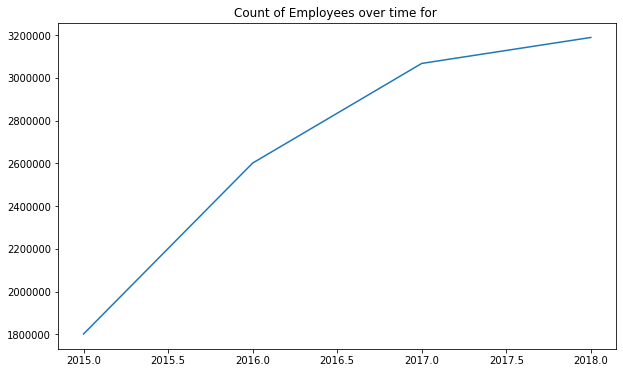

In [24]:

plt.figure(figsize=(10,6))
plt.plot(group.year_x,group.employees_on_platform)
plt.title('Count of Employees over time for ')
#plt.xticks(rotation=90)
plt.show()